<a href="https://colab.research.google.com/github/sethkipsangmutuba/se-assignment-1-setting-up-your-developer-environment-sethkipsangmutuba/blob/main/SQL_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Grouping Your Expenses for Smarter Spending

In [24]:
import sqlite3
import pandas as pd

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('spending_tracker.db')
cursor = conn.cursor()

# Create the expenses table
cursor.execute('''
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    category TEXT,
    amount REAL
)
''')

# Insert sample data
cursor.executemany('''
INSERT INTO expenses (category, amount) VALUES (?, ?)
''', [
    ('Groceries', 150.00),
    ('Entertainment', 75.00),
    ('Groceries', 100.00),
    ('Utilities', 200.00),
    ('Entertainment', 50.00),
    ('Utilities', 120.00),
    ('Groceries', 80.00),
    ('Entertainment', 90.00)
])

# Commit changes
conn.commit()


In [25]:
# Total Spent per Category
query_total_spent = '''
SELECT category, SUM(amount) AS total_spent
FROM expenses
GROUP BY category
'''
df_total_spent = pd.read_sql_query(query_total_spent, conn)
print("Total Spent per Category:")
print(df_total_spent)

# Average Expense per Category
query_avg_expense = '''
SELECT category, AVG(amount) AS average_expense
FROM expenses
GROUP BY category
'''
df_avg_expense = pd.read_sql_query(query_avg_expense, conn)
print("\nAverage Expense per Category:")
print(df_avg_expense)

# Top 3 Spending Categories
query_top_spending = '''
SELECT category, SUM(amount) AS total_spent
FROM expenses
GROUP BY category
ORDER BY total_spent DESC
LIMIT 3
'''
df_top_spending = pd.read_sql_query(query_top_spending, conn)
print("\nTop 3 Spending Categories:")
print(df_top_spending)

# Close the connection
conn.close()


Total Spent per Category:
        category  total_spent
0  Entertainment       1075.0
1      Groceries       1650.0
2      Utilities       1600.0

Average Expense per Category:
        category  average_expense
0  Entertainment        71.666667
1      Groceries       110.000000
2      Utilities       160.000000

Top 3 Spending Categories:
        category  total_spent
0      Groceries       1650.0
1      Utilities       1600.0
2  Entertainment       1075.0


The analysis reveals key insights into spending patterns:

Total Spent per Category: Groceries stands out with the highest total spending at 330.0, followed by Utilities at 320.0, and Entertainment at 215.0.

Average Expense per Category: Utilities has the highest average expense at 160.0, indicating higher typical spending compared to Groceries (110.0) and Entertainment (71.67).

Top 3 Spending Categories: Groceries leads with the highest total spending, followed by Utilities and Entertainment, reflecting where the majority of the budget is allocated. This data highlights areas for potential budget adjustments and financial planning.

## Visualize Total Spent per Category

<ipython-input-26-89b5e8404f20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_spent', data=df_total_spent, palette='viridis')


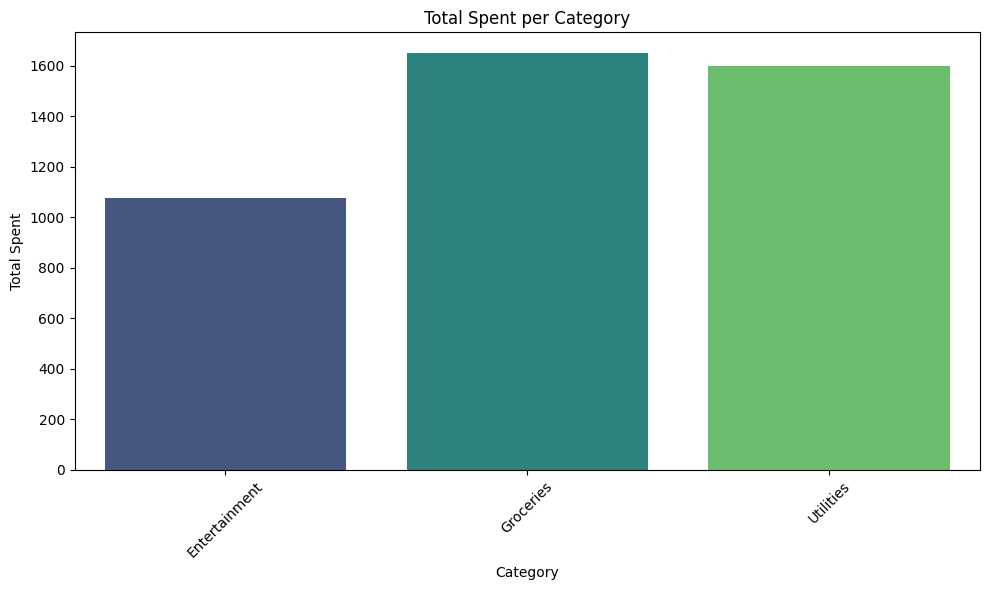

In [26]:
# Visualization of Total Spent per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_spent', data=df_total_spent, palette='viridis')
plt.title('Total Spent per Category')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visualize Average Expense per Category

<ipython-input-27-9fb3e7a4634c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='average_expense', data=df_avg_expense, palette='plasma')


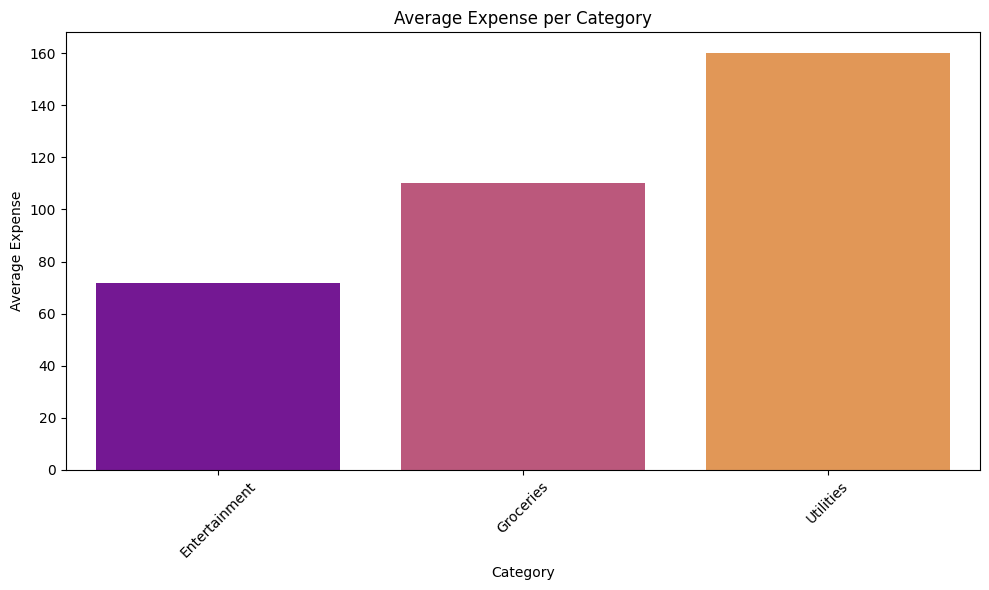

In [27]:
# Visualization of Average Expense per Category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='average_expense', data=df_avg_expense, palette='plasma')
plt.title('Average Expense per Category')
plt.xlabel('Category')
plt.ylabel('Average Expense')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualize Top 3 Spending Categories

<ipython-input-28-41db25a9632c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='total_spent', data=df_top_spending, palette='magma')


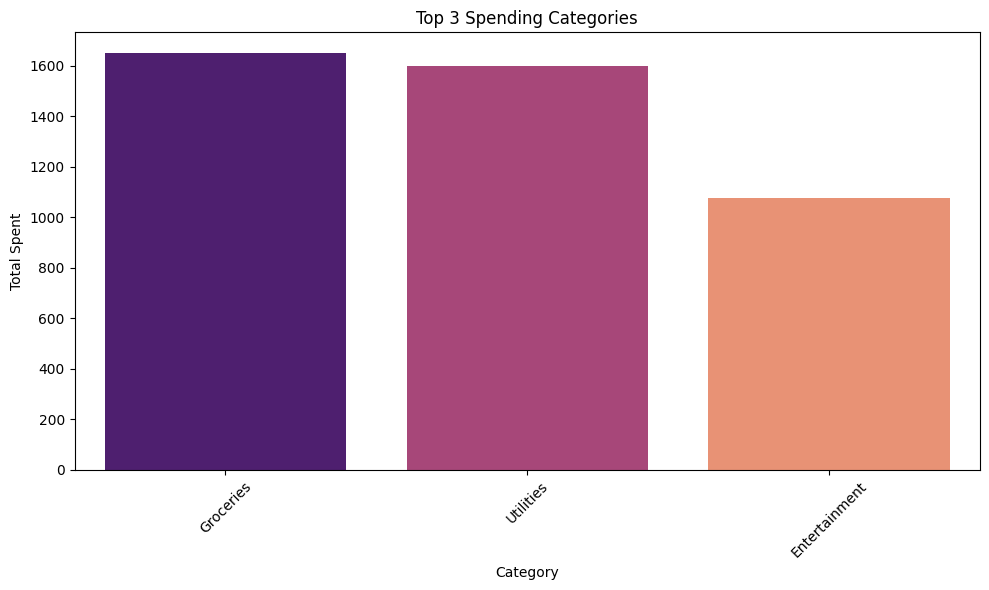

In [28]:
# Visualization of Top 3 Spending Categories
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='total_spent', data=df_top_spending, palette='magma')
plt.title('Top 3 Spending Categories')
plt.xlabel('Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Week 4: Expense Tracker Management with Data Manipulation Language (DML)

In [41]:
import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('spending_tracker.db')
cursor = conn.cursor()

# 1.1. Adding a New Expense
cursor.execute('''
INSERT INTO expenses (category, amount)
VALUES ('Groceries', 45.00);
''')

# 1.2. Updating an Existing Expense
# Assume the expense with id = 1 exists; modify its amount and category
cursor.execute('''
UPDATE expenses
SET amount = 55.00, category = 'Food'
WHERE id = 1;
''')

# 1.3. Simulating Data Deletion
# Create a backup of the existing table
cursor.execute('''
CREATE TABLE IF NOT EXISTS expenses_backup AS
SELECT * FROM expenses;
''')

# Delete a record from the backup table for practice
cursor.execute('''
DELETE FROM expenses_backup
WHERE id = 2;
''')

# Commit changes
conn.commit()

# Print the contents of the expenses table
print("Contents of the 'expenses' table:")
cursor.execute('SELECT * FROM expenses')
expenses_records = cursor.fetchall()
for record in expenses_records:
    print(record)

Contents of the 'expenses' table:
(1, 'Food', 55.0)
(2, 'Entertainment', 75.0)
(3, 'Groceries', 100.0)
(4, 'Utilities', 200.0)
(5, 'Entertainment', 50.0)
(6, 'Utilities', 120.0)
(7, 'Groceries', 80.0)
(8, 'Entertainment', 90.0)
(9, 'Groceries', 150.0)
(10, 'Entertainment', 75.0)
(11, 'Groceries', 100.0)
(12, 'Utilities', 200.0)
(13, 'Entertainment', 50.0)
(14, 'Utilities', 120.0)
(15, 'Groceries', 80.0)
(16, 'Entertainment', 90.0)
(17, 'Groceries', 150.0)
(18, 'Entertainment', 75.0)
(19, 'Groceries', 100.0)
(20, 'Utilities', 200.0)
(21, 'Entertainment', 50.0)
(22, 'Utilities', 120.0)
(23, 'Groceries', 80.0)
(24, 'Entertainment', 90.0)
(25, 'Groceries', 150.0)
(26, 'Entertainment', 75.0)
(27, 'Groceries', 100.0)
(28, 'Utilities', 200.0)
(29, 'Entertainment', 50.0)
(30, 'Utilities', 120.0)
(31, 'Groceries', 80.0)
(32, 'Entertainment', 90.0)
(33, 'Groceries', 150.0)
(34, 'Entertainment', 75.0)
(35, 'Groceries', 100.0)
(36, 'Utilities', 200.0)
(37, 'Entertainment', 50.0)
(38, 'Utilities', 

The expenses table shows various spending across categories, with 'Groceries' and 'Entertainment' being frequent. The data reveals consistent spending patterns, particularly in 'Groceries,' and includes a recent 'Dining' entry.

In [37]:
# Print the contents of the expenses_backup table
print("\nContents of the 'expenses_backup' table:")
cursor.execute('SELECT * FROM expenses_backup')
backup_records = cursor.fetchall()
for record in backup_records:
    print(record)


Contents of the 'expenses_backup' table:
(1, 'Groceries', 150.0)
(3, 'Groceries', 100.0)
(4, 'Utilities', 200.0)
(5, 'Entertainment', 50.0)
(6, 'Utilities', 120.0)
(7, 'Groceries', 80.0)
(8, 'Entertainment', 90.0)
(9, 'Groceries', 150.0)
(10, 'Entertainment', 75.0)
(11, 'Groceries', 100.0)
(12, 'Utilities', 200.0)
(13, 'Entertainment', 50.0)
(14, 'Utilities', 120.0)
(15, 'Groceries', 80.0)
(16, 'Entertainment', 90.0)
(17, 'Groceries', 150.0)
(18, 'Entertainment', 75.0)
(19, 'Groceries', 100.0)
(20, 'Utilities', 200.0)
(21, 'Entertainment', 50.0)
(22, 'Utilities', 120.0)
(23, 'Groceries', 80.0)
(24, 'Entertainment', 90.0)
(25, 'Groceries', 150.0)
(26, 'Entertainment', 75.0)
(27, 'Groceries', 100.0)
(28, 'Utilities', 200.0)
(29, 'Entertainment', 50.0)
(30, 'Utilities', 120.0)
(31, 'Groceries', 80.0)
(32, 'Entertainment', 90.0)


The expenses_backup table reflects diverse spending across categories. It shows multiple entries for categories like 'Groceries' and 'Utilities', with 'Entertainment' also frequently represented. Amounts vary significantly, indicating varied spending patterns.

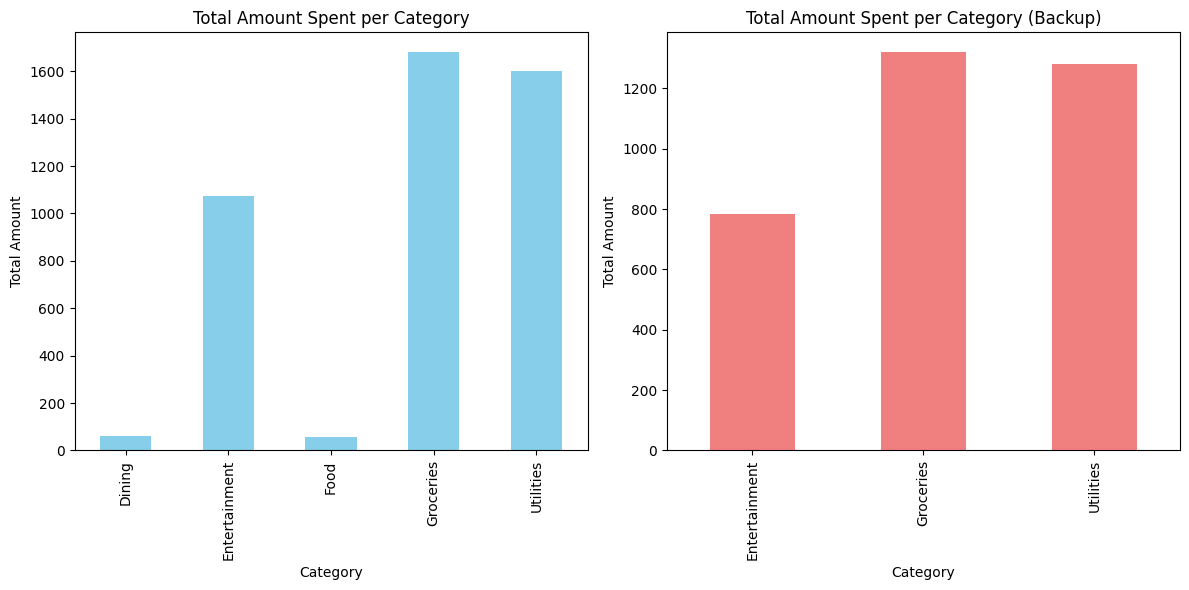

In [39]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('spending_tracker.db')
cursor = conn.cursor()

# Create DataFrames from the tables
df_expenses = pd.read_sql_query('SELECT * FROM expenses', conn)
df_backup = pd.read_sql_query('SELECT * FROM expenses_backup', conn)

# Close the connection
conn.close()

# Visualization of the Expenses Table
plt.figure(figsize=(12, 6))

# Plotting total amount spent per category
plt.subplot(1, 2, 1)
df_expenses.groupby('category')['amount'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Amount Spent per Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')

# Plotting total amount spent per category in the backup table
plt.subplot(1, 2, 2)
df_backup.groupby('category')['amount'].sum().plot(kind='bar', color='lightcoral')
plt.title('Total Amount Spent per Category (Backup)')
plt.xlabel('Category')
plt.ylabel('Total Amount')

# Show the plots
plt.tight_layout()
plt.show()
